Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C://Users//YashnNaisha//Desktop//Data Science//NYC//311_complaints.csv")

C:\Users\YashnNaisha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [5]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

Calculating the Request Closing Time which shows the time it took to resolve the complaint.

In [6]:
df['Request_closing_time'] = (df['Closed Date'] - df['Created Date']).dt.days
df_clean=df[df['Request_closing_time'].notnull()]
df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
df_perfect['Month'] = df_perfect['Created Date'].dt.month
df_perfect['Year'] = df_perfect['Created Date'].dt.year
df_perfect=df_perfect[df_perfect.Borough!='Unspecified']

In [7]:
df_clean.shape

(298534, 54)

Most and Least frequent Complaints 

<AxesSubplot:title={'center':'Most and Least common complaints'}>

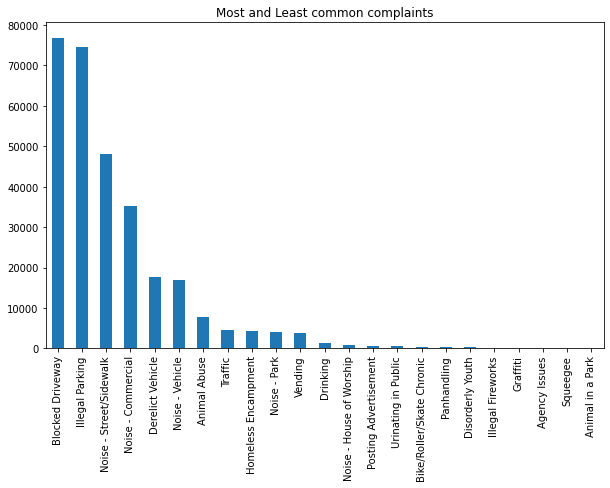

In [8]:
(df_clean['Complaint Type'].value_counts()).plot(kind='bar',figsize=(10,6),title='Most and Least common complaints')

In [9]:
df_clean.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude,Request_closing_time
count,2.985340e+05,298027.000000,2.971020e+05,297102.000000,0.0,0.0,0.0,0.0,0.0,297102.000000,297102.000000,298534.000000
mean,3.130087e+07,10848.929886,1.004855e+06,203753.772782,NaN,NaN,NaN,NaN,NaN,40.725883,-73.925625,0.016042
std,5.740837e+05,583.173185,2.175284e+04,29880.600637,NaN,NaN,NaN,NaN,NaN,0.082014,0.078452,0.181683
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937,0.000000
25%,3.080121e+07,10310.000000,9.919760e+05,183337.500000,NaN,NaN,NaN,NaN,NaN,40.669789,-73.972142,0.000000
50%,3.130562e+07,11208.000000,1.003160e+06,201110.000000,NaN,NaN,NaN,NaN,NaN,40.718655,-73.931780,0.000000
75%,3.178561e+07,11238.000000,1.018372e+06,224123.000000,NaN,NaN,NaN,NaN,NaN,40.781816,-73.876805,0.000000
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760,24.000000


In [10]:
df_clean['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

# Complaint distribution across Boroughs

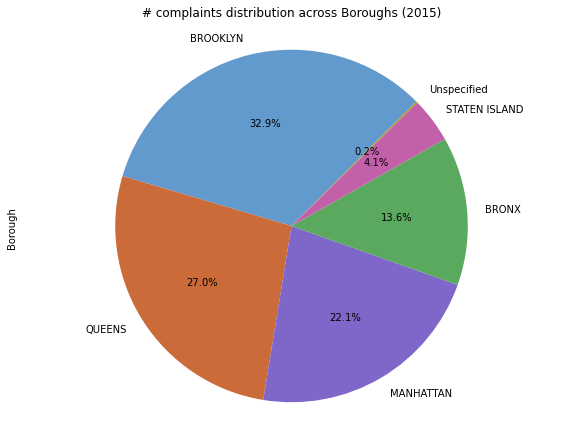

In [11]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_clean['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = None, startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

The above Piechart shows that highest number of complaints are from BROOKLYN and second highest from QUEENS

In [12]:
df_Brooklyn = df_clean[df_clean['Borough']=='BROOKLYN']

In [13]:
df_Brooklyn.shape

(98295, 54)

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

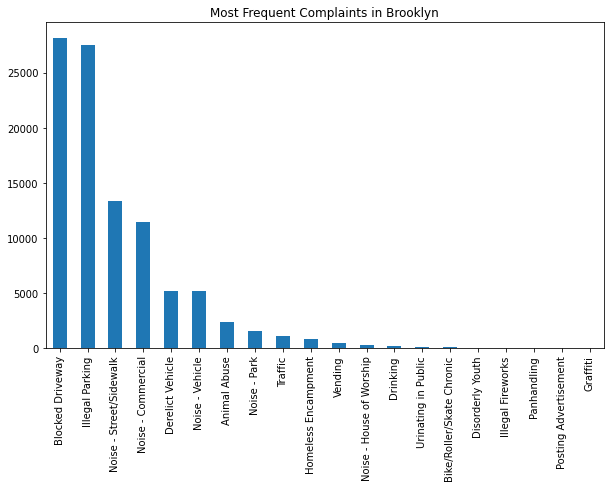

In [14]:
(df_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

In Brooklyn, highest number of complaints are of Blocked Driveway and Illegal Parking 

In [15]:
df_queens = df_clean[df_clean['Borough']=='QUEENS']
df_queens.shape

(80629, 54)

<AxesSubplot:title={'center':'Most Frequent Complaints in Queens'}>

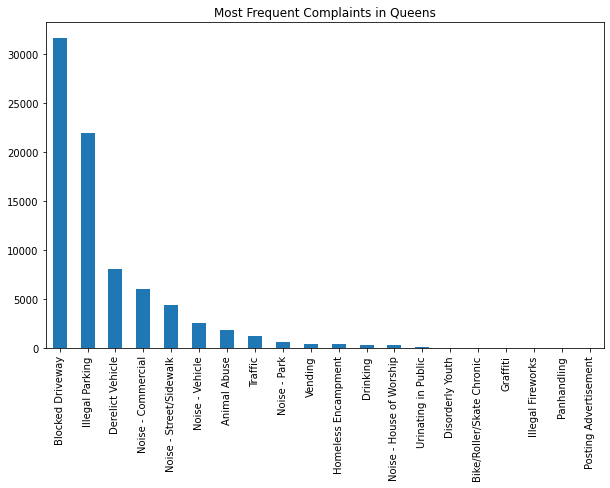

In [16]:
(df_queens['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Queens')

In Queens as well, the highest number of compliants are for blocked Driveway and Illegal Parking.

Status of complaints

In [17]:
df_clean['Status'].value_counts()

Closed      298471
Open            36
Assigned        26
Draft            1
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Status'}>

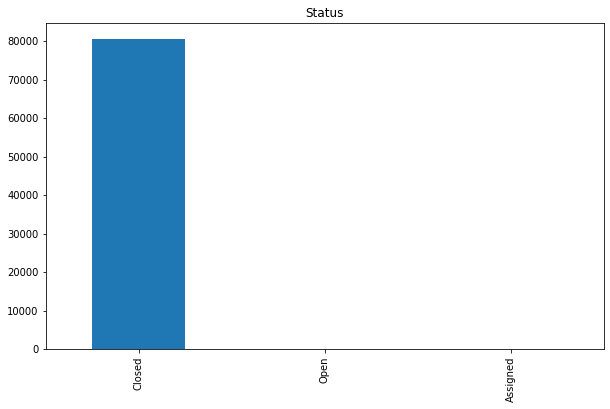

In [18]:
(df_queens['Status'].value_counts()).plot(kind='bar',
                                                    figsize=(10,6),title = 'Status')

Average Response Time of resolving Complaints grouping for different locations


In [19]:
df_clean['City'].isnull().sum()

506

In [20]:
df_clean['City'].fillna('Not Available', inplace=True)

C:\Users\YashnNaisha\anaconda3\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [21]:
df_nyc_grouped = df_clean.groupby(['City', 'Complaint Type'])


In [22]:
df_nyc_mean = df_nyc_grouped.mean()['Request_closing_time']
df_nyc_mean.isnull().sum()

0

In [23]:
df_nyc_grouped = df_clean.groupby(['City','Complaint Type']).agg({'Request_closing_time': 'mean'})
df_nyc_grouped

Request_closing_time
City     Complaint Type                               
ARVERNE  Animal Abuse                             0.00
         Blocked Driveway                         0.00
         Derelict Vehicle                         0.00
         Disorderly Youth                         0.00
         Drinking                                 0.00
...                                                ...
Woodside Blocked Driveway                         0.00
         Derelict Vehicle                         0.00
         Illegal Parking                          0.01
         Noise - Commercial                       0.00
         Noise - Street/Sidewalk                  0.00

[778 rows x 1 columns]

In [24]:
# Null Hypothesis: H0 : All Complain Types average response time mean is similar
# Alternate Hypothesis:  H1 : Not similar

In [25]:
top5_complaint_type = df_clean['Complaint Type'].value_counts()[:5]
top5_complaint_type

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Name: Complaint Type, dtype: int64

In [26]:
sample_data = df_clean.loc[df_clean['Complaint Type'].isin(top5_complaint_type.index),['Complaint Type', 'Request_closing_time']]
sample_data.head()

,Complaint Type,Request_closing_time
0,Noise - Street/Sidewalk,0.0
1,Blocked Driveway,0.0
2,Blocked Driveway,0.0
3,Illegal Parking,0.0
4,Illegal Parking,0.0


In [27]:
sample_data.shape

(252253, 2)

In [28]:
sample_data.isnull().sum()

Complaint Type          0
Request_closing_time    0
dtype: int64

Performing Statistical Test

In [29]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(df_clean,title='Data Report')
# profile.to_file(output_file='output.html')

In [30]:
sample_data = df_clean.loc[df_clean['Complaint Type'].isin(top5_complaint_type.index),['Complaint Type', 'City']]
sample_data.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [31]:
pd.crosstab(sample_data['Complaint Type'], sample_data['City'], margins=True)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,35,2618,116,377,95,3,12754,28147,147,0,...,942,1548,262,2142,206,208,1059,1613,11,76810
Derelict Vehicle,27,351,12,198,89,3,1952,5179,115,0,...,358,289,210,1766,10,227,308,247,2,17588
Illegal Parking,58,1068,213,514,106,15,7859,27461,76,2,...,494,462,238,4886,122,525,682,891,100,74532
Noise - Commercial,2,1293,261,40,37,4,2433,11458,12,0,...,70,198,36,677,161,16,175,209,2,35247
Noise - Street/Sidewalk,29,386,114,15,13,1,8890,13354,25,95,...,105,91,38,816,65,33,86,250,5,48076
All,151,5716,716,1144,340,26,33888,85599,375,97,...,1969,2588,784,10287,564,1009,2310,3210,120,252253


In [32]:
import scipy.stats as stats

In [33]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data['Complaint Type'], sample_data['City']))

In [34]:
print(ch2)
print(p_value)

73076.9289804761
0.0


In [ ]:
#We can see pvalue is less than 0.05 so we reject null hypothesis means complain type and location are not independent.